# Business Intelligence and Analytics - Assignment


Welcome to the Assignment! You have to complete this notebook to find the answers to the 16 questions below. The data needed can be found in the data subfolder.

In order to properly submit the assignment, you will have to do **both** steps mentioned below. Both of these must be done on the Moodle page, right under the forums.
- Answer the questions on the [quiz](https://moodle.unil.ch/mod/quiz/view.php?id=1029998).
- Submit your [notebook](https://moodle.unil.ch/mod/assign/view.php?id=1034597).

Make sure to follow all instructions carefully.

Good luck!


### Part 1 - Data Cleaning

**IMPORTANT:** In this part, whenever you are asked to perform an operation on the DataFrame (dropping rows, changing datatypes, etc.), you should always continue the exercise with the altered DataFrame.

First, begin by importing pandas.

In [1]:
import pandas as pd 


Load the dataset that contains various information about every company on the 2018 edition of the Fortune 500 list. That list is an annual ranking of the 500 largest US corporations (by revenues). The individual columns should be self-explanatory.

You have to find the corresponding url yourself. The dataset is located in the assignment folder under data. Taking a look at the raw data before loading it might be useful.

In [2]:
fortune_500 = pd.read_csv('https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/assignment/data/fortune500.csv', delimiter = ';')
fortune_500.head()


,Rank,Company,Previous Rank,Revenues ($M),Profits ($M),Assets ($M),Market Value ($M),Employees,CEO,CEO Title,CEO Gender,Sector,Industry,Years on Fortune 500 List,City,State,Latitude,Longitude
0,1,Walmart,1.0,500343.0,9862,204522,263563.0,2300000,C. Douglas McMillon,"President, Chief Executive Officer & Director",Male,Retailing,General Merchandisers,24,Bentonville,AR,36.372854,-94.208817
1,2,Exxon Mobil,4.0,244363.0,19710,348691,316157.0,71200,Darren W. Woods,Chairman & Chief Executive Officer,Male,Energy,Petroleum Refining,24,Irving,TX,32.814018,-96.948894
2,3,Berkshire Hathaway,2.0,242137.0,44940,702095,492008.0,377000,Warren E. Buffett,"Chairman, President & Chief Executive Officer",Male,Financials,Insurance: Property and Casualty (Stock),24,Omaha,NE,41.256537,-95.934503
3,4,Apple,3.0,229234.0,48351,375319,851318.0,123000,Timothy D. Cook,Chairman & Chief Executive Officer,Male,Technology,"Computers, Office Equipment",24,Cupertino,CA,37.322998,-122.032182
4,5,UnitedHealth Group,6.0,201159.0,10558,139058,207080.0,260000,David S. Wichmann,Chairman & Chief Executive Officer,Male,Health Care,Health Care: Insurance and Managed Care,24,Minnetonka,MN,44.921184,-93.468749


#### Question 1: How many rows and columns does the DataFrame contain?

In [3]:
fortune_500.shape

(500, 18)

Now take a look at the datatypes of the columns.

In [4]:
fortune_500.dtypes


Rank                           int64
Company                       object
Previous Rank                float64
Revenues ($M)                float64
Profits ($M)                  object
Assets ($M)                    int64
Market Value ($M)            float64
Employees                      int64
CEO                           object
CEO Title                     object
CEO Gender                    object
Sector                        object
Industry                      object
Years on Fortune 500 List      int64
City                          object
State                         object
Latitude                     float64
Longitude                    float64
dtype: object

We can see that there are several columns that should have a different datatype than what they currently do. Therefore you should now do the following transformations:

| Columns | Wanted Datatype |
| :---: | :---: |
| Profits ($M) | Numerical continuous |
| CEO Title | categorical nominal |
| CEO Gender | categorical nominal |
| Sector | categorical nominal |
| Industry | categorical nominal |
| State | categorical nominal |

All invalid entries that cannot be converted should appear as null values in the DataFrame after you are done with the changes.

In [5]:
fortune_500['Profits ($M)'] = pd.to_numeric(fortune_500['Profits ($M)'], errors='coerce')
fortune_500['CEO Title'] = fortune_500['CEO Title'].astype('category')
fortune_500['CEO Gender'] = fortune_500['CEO Gender'].astype('category')
fortune_500['Sector'] = fortune_500['Sector'].astype('category')
fortune_500['Industry'] = fortune_500['Industry'].astype('category')
fortune_500['State'] = fortune_500['State'].astype('category')

print(fortune_500.dtypes)

Rank                            int64
Company                        object
Previous Rank                 float64
Revenues ($M)                 float64
Profits ($M)                  float64
Assets ($M)                     int64
Market Value ($M)             float64
Employees                       int64
CEO                            object
CEO Title                    category
CEO Gender                   category
Sector                       category
Industry                     category
Years on Fortune 500 List       int64
City                           object
State                        category
Latitude                      float64
Longitude                     float64
dtype: object


We will not need the coordinates of the companies' headquarters. Drop the appropriate columns.

In [6]:
old_fortune_500 = fortune_500
fortune_500 = fortune_500.drop(['Latitude', 'Longitude'], axis=1)

print(fortune_500.dtypes)
fortune_500.head()

Rank                            int64
Company                        object
Previous Rank                 float64
Revenues ($M)                 float64
Profits ($M)                  float64
Assets ($M)                     int64
Market Value ($M)             float64
Employees                       int64
CEO                            object
CEO Title                    category
CEO Gender                   category
Sector                       category
Industry                     category
Years on Fortune 500 List       int64
City                           object
State                        category
dtype: object


,Rank,Company,Previous Rank,Revenues ($M),Profits ($M),Assets ($M),Market Value ($M),Employees,CEO,CEO Title,CEO Gender,Sector,Industry,Years on Fortune 500 List,City,State
0,1,Walmart,1.0,500343.0,9862.0,204522,263563.0,2300000,C. Douglas McMillon,"President, Chief Executive Officer & Director",Male,Retailing,General Merchandisers,24,Bentonville,AR
1,2,Exxon Mobil,4.0,244363.0,19710.0,348691,316157.0,71200,Darren W. Woods,Chairman & Chief Executive Officer,Male,Energy,Petroleum Refining,24,Irving,TX
2,3,Berkshire Hathaway,2.0,242137.0,44940.0,702095,492008.0,377000,Warren E. Buffett,"Chairman, President & Chief Executive Officer",Male,Financials,Insurance: Property and Casualty (Stock),24,Omaha,NE
3,4,Apple,3.0,229234.0,48351.0,375319,851318.0,123000,Timothy D. Cook,Chairman & Chief Executive Officer,Male,Technology,"Computers, Office Equipment",24,Cupertino,CA
4,5,UnitedHealth Group,6.0,201159.0,10558.0,139058,207080.0,260000,David S. Wichmann,Chairman & Chief Executive Officer,Male,Health Care,Health Care: Insurance and Managed Care,24,Minnetonka,MN


#### Question 2: What column has the most missing values?




In [7]:
fortune_500.isnull().sum()


Rank                          0
Company                       0
Previous Rank                 5
Revenues ($M)                 0
Profits ($M)                  7
Assets ($M)                   0
Market Value ($M)            28
Employees                     0
CEO                           7
CEO Title                     2
CEO Gender                    0
Sector                        2
Industry                      8
Years on Fortune 500 List     0
City                          0
State                         0
dtype: int64

Drop the rows with missing values.

In [8]:
fortune_500 = fortune_500.dropna()

fortune_500.isnull().sum()


Rank                         0
Company                      0
Previous Rank                0
Revenues ($M)                0
Profits ($M)                 0
Assets ($M)                  0
Market Value ($M)            0
Employees                    0
CEO                          0
CEO Title                    0
CEO Gender                   0
Sector                       0
Industry                     0
Years on Fortune 500 List    0
City                         0
State                        0
dtype: int64

#### Question 3: How many rows were dropped?

In [9]:
#compare to first shape instruction : fortune_500.shape

length = len(old_fortune_500.index) - len(fortune_500.index)

print(length)


55


#### Question 4: What percentage of CEOs are women? (Round to two decimals)

(1.01% should be entered as 1.01)

In [10]:
#TODO: COMPUTE THE PERCENTAGE OF WOMEN CEOs
values = fortune_500["CEO Gender"].value_counts()
proportion = values["Female"]/(values["Female"] + values["Male"])

print("Women account for {}% of CEOs.".format(round(proportion*100,2 )))


Women account for 5.17% of CEOs.


We are now interested in the change in rank each company made over the past year.

In [11]:
past_rank = fortune_500['Previous Rank']
rank = fortune_500['Rank']

fortune_500['change in rank'] = past_rank - rank # if -1 --> went down 1 rank. If 1 -> went up one rank

fortune_500.head()



,Rank,Company,Previous Rank,Revenues ($M),Profits ($M),Assets ($M),Market Value ($M),Employees,CEO,CEO Title,CEO Gender,Sector,Industry,Years on Fortune 500 List,City,State,change in rank
0,1,Walmart,1.0,500343.0,9862.0,204522,263563.0,2300000,C. Douglas McMillon,"President, Chief Executive Officer & Director",Male,Retailing,General Merchandisers,24,Bentonville,AR,0.0
1,2,Exxon Mobil,4.0,244363.0,19710.0,348691,316157.0,71200,Darren W. Woods,Chairman & Chief Executive Officer,Male,Energy,Petroleum Refining,24,Irving,TX,2.0
2,3,Berkshire Hathaway,2.0,242137.0,44940.0,702095,492008.0,377000,Warren E. Buffett,"Chairman, President & Chief Executive Officer",Male,Financials,Insurance: Property and Casualty (Stock),24,Omaha,NE,-1.0
3,4,Apple,3.0,229234.0,48351.0,375319,851318.0,123000,Timothy D. Cook,Chairman & Chief Executive Officer,Male,Technology,"Computers, Office Equipment",24,Cupertino,CA,-1.0
4,5,UnitedHealth Group,6.0,201159.0,10558.0,139058,207080.0,260000,David S. Wichmann,Chairman & Chief Executive Officer,Male,Health Care,Health Care: Insurance and Managed Care,24,Minnetonka,MN,1.0


#### Question 5: What company gained the most ranks?

In [12]:
#TODO: FIND THE COMPANY THAT GAINED THE MOST RANKS
fortune_500.loc[fortune_500['change in rank'].idxmax()]

Rank                                                                    275
Company                                                Molson Coors Brewing
Previous Rank                                                           522
Revenues ($M)                                                         11003
Profits ($M)                                                         1414.2
Assets ($M)                                                           30247
Market Value ($M)                                                     16238
Employees                                                             17200
CEO                                                          Mark R. Hunter
CEO Title                    President, Chief Executive Officer &  Director
CEO Gender                                                             Male
Sector                                           Food, Beverages &  Tobacco
Industry                                                          Beverages
Years on For

### Part 2 - Regression 

For this part, you are going to build a linear regression model on crypto-currency trades. Each column of the dataset stands for: 


*   Name - the stock's ticker name
*   Date - in format: yy-mm-dd
*   Open - price of the stock when the market opened (NYSE data therefore all in USD)
*   High - Highest price the stock reached that day
*   Close - price of the stock when the market closed (NYSE data therefore all in USD)
*   Volume - Number of shares traded that day
*   Market -  Total amount of trades on the market that day
*   spread - Trading metric 



**Task:** Build a linear regression model for the **closing price** of Bitcoin related crypto currencies using the following attributes: 

`[date,open,high,low,market,volume,spread,name]`

First, load the data and make a simple datatype conversion.



In [13]:
#TODO: RUN THE CELL TO FETCH DATA AND START WORKING 
url = 'https://storage.googleapis.com/unil_bia/cryptocurrencies.csv'
df = pd.read_csv(url, parse_dates=["date"],date_parser= pd.to_datetime)
df.head()

,name,date,open,high,low,close,volume,market,close_ratio,spread
0,Bitcoin,2013-04-28,135.255145,135.986539,132.112308,134.233987,-0.102051,1.488567e+09,0.669039,3.817072
1,Bitcoin,2013-04-29,134.502146,147.594147,133.974345,144.426900,0.089815,1.603769e+09,0.812517,13.470633
2,Bitcoin,2013-04-30,144.034751,146.889644,134.002753,138.996846,0.003391,1.542813e+09,0.381134,13.022239
3,Bitcoin,2013-05-01,139.053026,139.927856,107.722048,117.097449,0.025182,1.298955e+09,0.346369,32.148365
4,Bitcoin,2013-05-02,116.372753,125.486945,92.185492,105.125030,-0.025268,1.168517e+09,0.538017,33.301740


In [14]:
#RUN TO TURN DATE DATA TO USABLE TYPE (INT)
from datetime import datetime
df.date=df.date.map(datetime.toordinal)

You will now build the regression model.




#### Question 6: How many Bitcoin related cryptos are in the dataset?

 > _Hint_: Bitcoin related crypto currencies all start with "Bitcoin"




In [15]:
#TODO: WRITE CODE TO GET ALL BITCOIN RELATED CRYPTO INTO A SEPARATE DATAFRAME
#HINT: look up str.startswith

bitcoin = df[df['name'].str.startswith('Bitcoin')].copy() #le copy évite un SettingwithCopyWarning
print("nbr of bitcoins: ", len(bitcoin.name.unique()))
bitcoin

nbr of bitcoins:  26


,name,date,open,high,low,close,volume,market,close_ratio,spread
0,Bitcoin,734986,135.255145,135.986539,132.112308,134.233987,-0.102051,1.488567e+09,0.669039,3.817072
1,Bitcoin,734987,134.502146,147.594147,133.974345,144.426900,0.089815,1.603769e+09,0.812517,13.470633
2,Bitcoin,734988,144.034751,146.889644,134.002753,138.996846,0.003391,1.542813e+09,0.381134,13.022239
3,Bitcoin,734989,139.053026,139.927856,107.722048,117.097449,0.025182,1.298955e+09,0.346369,32.148365
4,Bitcoin,734990,116.372753,125.486945,92.185492,105.125030,-0.025268,1.168517e+09,0.538017,33.301740
...,...,...,...,...,...,...,...,...,...,...
30236,Bitcoin God,737023,11.178101,11.249703,9.387478,9.448743,818.083987,1.271032e-01,0.184455,1.692106
30237,Bitcoin God,737024,9.349067,9.776571,7.038651,8.851681,2028.001762,-3.974333e-02,0.535468,2.699147
30238,Bitcoin God,737025,8.947704,12.663321,8.660172,12.666721,222.952552,-1.066687e-02,0.829474,4.054052
30239,Bitcoin God,737026,12.362739,12.427160,9.051561,9.932116,1521.849560,-3.016509e-02,0.120363,3.729621


In [16]:
'''
# Test pour savoir s'il y a plusieurs type de Bitcoin (car c'est pas clair dans la donnée)
test = bitcoin[(bitcoin['name'] == 'Bitcoin')]
print('1 ', df.shape)
print('bitcoin ', bitcoin.shape)
print('test', test.shape)
'''
 
#MODIFICATION 29th of April 3 00:PM
 
#TODO: WRITE CODE TO SELECT FEATURES OF INTEREST IN THE DATA SET AND APPLY APPROPRIATE TRANSFORMATION
 
#--------------------------------------------------------------------------------
bitcoin.dropna(inplace=True)
#-------------------------------------------------------------------------------
#HINT: use DataFrame indexing, look up the functions  .get_dummies 
bitcoin2 = pd.get_dummies(bitcoin, columns=['name'])
#bitcoin2.loc[:, bitcoin2.columns.str.startswith('name')] = bitcoin2.loc[:, bitcoin2.columns.str.startswith('name')].astype(int)
#-------------------------------------------------------------------------------
#DATAFRAME WITH THE INDEPENDENT VARIABLES
#DATAFRAME WITH THE DEPENDENT VARIABLE
X = bitcoin2[['date', 'open','high','low','market','volume','spread']] # missing names
X_temp = bitcoin2.loc[:, bitcoin2.columns.str.startswith('name')] #only names
X = pd.concat([X, X_temp], axis=1) #Put them together yay
y = bitcoin2['close']
 
print(X.shape)
print(y.shape)

(12509, 33)
(12509,)



#### Question 7: How many rows and columns does the test set contain? (only independent variables)
>You will have to split the data set into training and testing set with respective relative proportion of **70% and 30%** to first train your model and then assess its accuracy.
>
> You should shuffle your data set when splitting to render your reproduction more robust. Use **`random_state = 42`**
>
> Since features will not be on the same scale, you should standardize your data before modeling using a **StandardScaler**
>
>_Hint_: use the class sklearn.preprocessing
 



In [17]:
#TODO: CODE TO SPLIT DATA SET IN TRAIN AND TEST, RANDOM SHUFFLING
#HINT: look up the function model_selection.train_test_split, preprocessing.StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#print(bitcoin.dtypes)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, shuffle = True)
print("How many rows and columns does the test set contain? (only independent variables) --> ", x_test.shape)
print(x_test.shape)

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test) # ss keeps info of the fit above, not do another fit to keep coherence
'''
ss.fit(x_train, y_train)
x_train = ss.transform(x_train)
x_test == ss.transform(x_test)
'''

How many rows and columns does the test set contain? (only independent variables) -->  (3753, 33)
(3753, 33)


'\nss.fit(x_train, y_train)\nx_train = ss.transform(x_train)\nx_test == ss.transform(x_test)\n'

 
#### Question 8: What is the mean squared error of your linear model on the standardized test set? (round to 2 decimals)

  >  You should also pay attention to the types of your variables some are categorical and others are not even numbers. 
  >
  > _Hint_: there are categorical features among these attributes. You need to encode them with one-hot encoding first. Use the get_dummies function.

#### Question 9: What is the mean absolute error of your linear model on the standardized test set? (round to 2 decimals)
  > _Hint_: use the classes sklearn.train_test_split, sklearn.linear_model.LinearRegression._, and sklearn.metrics

In [18]:
#TODO: CODE TO COMPUTE LINEAR MODEL AND ACCURACY METRICS
#HINT: Look up linear_model,metrics.mean_squared_error,metrics.mean_absolute_error
 
#---Create linear regression object
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
lr = LinearRegression()
 
#---Train the model using the training sets
#lr = lr.fit(x_train, y_train) #returns itself, need to be attributed as it returns a value
lr.fit(x_train, y_train) 
 
#---Make predictions using the testing set
predictions = lr.predict(x_test)
#print("predictioooooon", predictions)
 
#---The coefficients
print("Intercept (slope): ", lr.intercept_) 
print("Features coefficients (weigths): ", lr.coef_)
 
#---The mean squared error
mse = mean_squared_error(y_test, predictions)
print('mean sqared error: ----->  %.2f' % mse)
 
#---The mean absoluuuuute error
mae = mean_absolute_error(y_test, predictions)
print('mean absolute error: ----->  %.2f' % mae)
 
#---The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_test, predictions)
print('R^2: ------> %.2f' % r2)

Intercept (slope):  418.72967028013056
Features coefficients (weigths):  [-2.23939273e+00 -4.92623406e+02  2.26267622e+03 -7.24022252e+02
  6.82989877e+02 -1.67653661e+01 -1.07230312e+02  1.66593144e+13
  1.13907228e+13  3.55658846e+12  7.12293392e+12  8.75792152e+12
  7.56959744e+12  1.42743750e+13  4.36205769e+12  7.18428509e+12
  7.90662022e+12  6.21137269e+12  3.95168254e+12  5.78365936e+12
  9.32062444e+12  1.50466629e+13  6.38772666e+12  7.94760857e+12
  1.98163204e+12  1.48966065e+13  4.38800348e+12  3.89358394e+12
  2.14901277e+12  2.35358653e+12  7.65543072e+12  8.09587261e+12
  2.75840221e+12]
mean sqared error: ----->  643.16
mean absolute error: ----->  8.57
R^2: ------> 1.00


### Part 3 - kNN Classifier 
Now, for the remaining part of the assignment, you are going to be building a kNN classifier on a bank records of credit card users. The name of each column of data is self-explanatory regarding the content of that field. The purpose of this part is to identify customer segments and be able to predict the average income group of a given user. 


**Task:** Build a kNN classifier for the **Income_Category** based on all features **except**:

`[CustomerID,Income_Category,Marital_Status,Education_Level]`

and test various values of k between 1 and 20 to find the most suiting one. 
  
In a first step, as always, load the dataset and display the first few rows.



In [19]:
#TODO: RUN THE CELL TO FETCH DATA AND START WORKING 
from sklearn.preprocessing import MinMaxScaler # Normalization
from sklearn.linear_model import LinearRegression # Regression linear model
from sklearn.model_selection import train_test_split # Splitting the data set
from sklearn.preprocessing import LabelEncoder #1-hot encoding
from sklearn.preprocessing import OneHotEncoder # Label encoding
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Metrics for errors
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix



url = 'https://storage.googleapis.com/unil_bia/BankChurners.csv'
df = pd.read_csv(url).drop('CustomerID.1', axis = 'columns')
df.head()

,CustomerID,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,77893100,49,M,2,High School,Single,$120K +,42,3,2,4,21143.988680,1190,19954.007404,0.495259,4895,66,0.778160,0.064341
1,77906340,42,F,4,Graduate,Single,Less than $40K,34,3,2,3,1853.010829,0,1852.985549,0.853042,4544,72,0.538390,-0.000950
2,77896672,53,F,5,Graduate,Single,$40K - $60K,41,2,1,3,9815.011727,1699,8116.013344,0.630096,7962,89,0.571813,0.182933
3,77907011,63,F,0,High School,Married,Less than $40K,53,5,3,2,2270.990406,1278,992.989510,0.372988,1550,33,0.666323,0.534439
4,77899573,51,M,1,Unknown,Single,$60K - $80K,22,2,3,3,4248.012193,1177,3071.015918,0.828221,13958,116,0.784340,0.294722


In [20]:
#Updated on May 12th
#TODO: CODE TO DO THE LABEL ENCODING HERE
#Note that the label encoding will turn ['$120K +', 'Less than $40K', '$40K - $60K', '$60K - $80K','Unknown', '$80K - $120K'] into [0, 4, 1, 2, 5, 3] in that order
#This means that '$120K +' becomes 0, 'Less than $40K' becomes 4, etc.
#HINT: look up preprocessing.LabelEncoder()
X = df.drop(['CustomerID','Income_Category','Marital_Status','Education_Level'], axis=1)
y = df[['Income_Category']]

y_label = y.apply(preprocessing.LabelEncoder().fit_transform)

You will now build the model.

In [21]:
#TODO: CODE TO COMPUTE THE FEATURES OF INTEREST IN THE DATA SET 
#HINT: use DataFrame indexing, look up the functions .get_dummies
#X['Gender'] = X['Gender'].replace(['M', 'F'], [0,1])
X = pd.get_dummies(X, columns=['Gender'])


In [22]:
X.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M
0,49,2,42,3,2,4,21143.988680,1190,19954.007404,0.495259,4895,66,0.778160,0.064341,0,1
1,42,4,34,3,2,3,1853.010829,0,1852.985549,0.853042,4544,72,0.538390,-0.000950,1,0
2,53,5,41,2,1,3,9815.011727,1699,8116.013344,0.630096,7962,89,0.571813,0.182933,1,0
3,63,0,53,5,3,2,2270.990406,1278,992.989510,0.372988,1550,33,0.666323,0.534439,1,0
4,51,1,22,2,3,3,4248.012193,1177,3071.015918,0.828221,13958,116,0.784340,0.294722,0,1


#### Question 10: How many rows and columns does the test set contain? (only independent variables)
> You will have to split the data set into a training and testing set with respective  relative proportion of **70% and 30%** to first train your model and then assess its accuracy.
>
> You should shuffle your data set when splitting to render your reproduction more robust. Use **`random_state = 42`**




In [23]:
#TODO: CODE TO SPLIT DATA SET IN TRAIN AND TEST, RANDOM SHUFFLING
#HINT: look up the functions model_selection.train_test_split and preprocessing.MinMaxScaler

x_train, x_test, y_train, y_test = train_test_split(X, y_label, test_size = 0.3, random_state=42, shuffle = True)

scaler = MinMaxScaler()
scaler.fit(x_train, y_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print('How many rows and columns does the test set contain? (only independent variables) ----> ', x_test.shape)


How many rows and columns does the test set contain? (only independent variables) ---->  (6410, 16)



#### Question 11: What k maximizes the accuracy_score on the minmax scaled test set? Test for k between 1 and 20.
  > You should also pay attention to the types of your variables some are categorical and others are not even figures. 
  >
  >_Hint_: there are categorical features among these attributes. You need to encode them with one-hot encoding first. Use the get_dummies function.
  >
  > You will have to encode you target feature to use it to build you classifier
>
  > As the scale in the features is different, you should standardize your data with a **MinMax** scaler to before using it. In fact when calculating the distances, you don't kNN to focus on larger scale dimensions. 
>
  >_Hint_  : use the class sklearn.preprocessing

#### Question 12: What is the accuracy for the optimal k on the minmax scaled test set? (round to 2 decimals)
  >_Hint_: use the classes sklearn.train_test_split, sklearn.neighbors.KNeighborsClassifier, sklearn.preprocessing.LabelEncoder, and sklearn.metrics



In [24]:
#TODO: CODE TO COMPUTE LINEAR MODEL AND ACCURACY METRICS
#HINT: Look up KNeighborsClassifier and metrics.accuracy_score
k=[]
for z in range(1, 21):
  k.append(z)

for i in k:
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train, y_train.values.ravel())
  score = model.score(x_test, y_test)
  print("accuracy for k = " + str(i) + " : " + str(score))


accuracy for k = 1 : 0.8728549141965679
accuracy for k = 2 : 0.773634945397816
accuracy for k = 3 : 0.719188767550702
accuracy for k = 4 : 0.6569422776911077
accuracy for k = 5 : 0.6271450858034321
accuracy for k = 6 : 0.5921996879875195
accuracy for k = 7 : 0.5741029641185648
accuracy for k = 8 : 0.5519500780031201
accuracy for k = 9 : 0.5438377535101404
accuracy for k = 10 : 0.5290171606864275
accuracy for k = 11 : 0.5274570982839314
accuracy for k = 12 : 0.5213728549141966
accuracy for k = 13 : 0.5170046801872075
accuracy for k = 14 : 0.5084243369734789
accuracy for k = 15 : 0.5087363494539782
accuracy for k = 16 : 0.5065522620904837
accuracy for k = 17 : 0.4995319812792512
accuracy for k = 18 : 0.49375975039001563
accuracy for k = 19 : 0.48954758190327613
accuracy for k = 20 : 0.48985959438377535


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


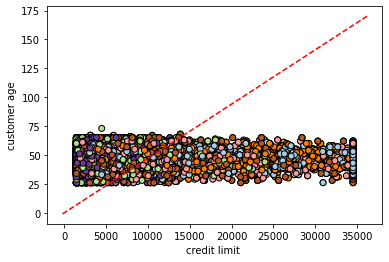

In [25]:
 #TODO: CODE FOR VISUALIZATION OF K VERSUS ACCURACY
model = KNeighborsClassifier(1)
model.fit(x_train, y_train)

#Decision boundaries ,
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

'''
plt.plot(k, acc)
plt.show()

'''
X_plot = X[['Credit_Limit', 'Customer_Age']]
model2 = LogisticRegression(max_iter=1000)
model2.fit(X_plot, y_label)

plt.scatter(X_plot['Credit_Limit'], X_plot['Customer_Age'], c=y_label.values, edgecolors='k', cmap=plt.cm.Paired)
ax = plt.gca()
x_vals = np.array(ax.get_xlim())
y_vals = (-x_vals * model2.coef_[0][0] - model2.intercept_[0])/model2.coef_[0][1]
plt.plot(x_vals, y_vals, '--', c="red")

plt.xlabel('credit limit ')
plt.ylabel('customer age')


plt.xticks()
plt.yticks()

plt.show()


#### Question 13: How many samples from your MinMax scaled test set were correctly classified in the ´\$40K - $60K´ income category? 
  >_Hint_: use the class sklearn.neighbors.KNeighborsClassifier.predict and sklearn.metric.confusion_matrix
  >
  >_Hint_: pay close attention to the class ordering of the confusion matrix so you look at the right category

[[1008    3    8   15    0    0]
 [  15  867   29   24   86   41]
 [  28   39  963   51   11    3]
 [  38   27   68  955    2    3]
 [   3  135   14    7  827   96]
 [   0   30    0    2   37  975]]


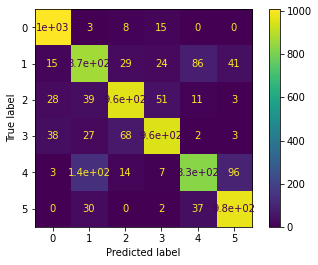

In [26]:
#TODO: CODE THE CONFUSION METRIC FOR YOUR OPTIMAL CLASSIFIER 
#HINT: look up the library sklearn.metrics and the function confusion_matrix
#y_test = y_test.reshape(-1, 1)
from sklearn.metrics import plot_confusion_matrix


cm = confusion_matrix(y_test, model.predict(x_test))

print(cm)
plot_confusion_matrix(model, x_test, y_test)

#### Question 14: Which income categories are predicted for the users with ids 77892545 and 77910120 with your optimal classifier? (k with the best accuracy)
  >_Hint_: use the class sklearn.neighbors.KNeighborsClassifier.predict


In [27]:
#TODO: CODE TO SELECT IDS 77892545 AND 77910120
#HINT: look up the function isin 
#TODO: CODE TO COMPUTE THE FEATURES OF INTEREST IN THE RESULTING DATA SET 
#HINT: use DataFrame indexing .get_dummies
selection = df.loc[df['CustomerID'].isin([77892545, 77910120])]
y_label2 = y_label[df['CustomerID'].isin([77892545, 77910120])]
selec_old1 = selection

selection = selection.drop(['CustomerID','Income_Category','Marital_Status','Education_Level'], axis=1)
selection = pd.get_dummies(selection, columns=['Gender'])
selec_old2 = selection


selection = scaler.transform(selection)


In [28]:
display(selec_old1.iloc[0])
selec_old2

CustomerID                  77910120
Customer_Age                      65
Gender                             F
Dependent_count                    0
Education_Level             Graduate
Marital_Status               Unknown
Income_Category              Unknown
Months_on_book                    36
Total_Relationship_Count           3
Months_Inactive_12_mon             3
Contacts_Count_12_mon              4
Credit_Limit                 2025.01
Total_Revolving_Bal             1701
Avg_Open_To_Buy              324.011
Total_Amt_Chng_Q4_Q1        0.619158
Total_Trans_Amt                 4056
Total_Trans_Ct                    71
Total_Ct_Chng_Q4_Q1         0.589509
Avg_Utilization_Ratio       0.821387
Name: 8703, dtype: object

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M
8703,65,0,36,3,3,4,2025.007335,1701,324.011241,0.619158,4056,71,0.589509,0.821387,1,0
12291,54,3,43,4,1,1,13219.011476,0,13219.004344,0.593912,1097,24,0.487970,0.011239,0,1


In [29]:
#TODO: CODE TO COMPUTE THE PREDICTION USING THE K WITH THE BEST ACCURACY 
#HINT: use KNeighborsClassifier.predict, KNeighborsClassifier.predict_proba, sklearn.preprocessing.LabelEncoder.inverse_transform
#Remember that the encoding turned ['$120K +', 'Less than $40K', '$40K - $60K', '$60K - $80K','Unknown', '$80K - $120K'] into [0, 4, 1, 2, 5, 3] in that order

predicted = model.predict(selection)
print(predicted)


[5 0]


#### Question 15: What are the probabilities for each of the two customers to be classified in the correct income category? (round to 2 decimals)
  >_Hint_: use the class sklearn.neighbors KNeighborsClassifier.predict_proba


In [30]:
#TODO: CODE TO COMPUTE THE PREDICTION USING THE K WITH THE BEST ACCURACY 
#HINT: use KNeighborsClassifier.predict,  KNeighborsClassifier.predict_proba
#Remember that the encoding turned ['$120K +', 'Less than $40K', '$40K - $60K', '$60K - $80K','Unknown', '$80K - $120K'] into [0, 4, 1, 2, 5, 3] in that order
#LabelEncoder.inverse_transform(knn_model.classes_)) should give probality and class correspondance 
predicted_proba = model.predict_proba(selection)
print(predicted_proba)

[[0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]]


#### Question 16: What are the probabilities for the users with IDs 77892545 and 77910120 (same as before), using a kNN Classifier with k=6, to be associated to `Less than 40K`  and `60K - 80K` respectively? (round to 2 decimals)
  >_Hint_: use the class sklearn.neighbors KNeighborsClassifier.predict_proba
  >
  >_Hint_: use the class sklearn.preprocessing.LabelEncoder.Inverse_transform on KNeighborsClassifier.classes_ to get class correspondence, use the class KNeighborsClassifier.predict_proba

In [31]:
 #TODO: CODE TO COMPUTE THE PREDICTION USING K = 6 
#HINT: use KNeighborsClassifier.predict,  KNeighborsClassifier.predict_proba
#Remember that the encoding turned ['$120K +', 'Less than $40K', '$40K - $60K', '$60K - $80K','Unknown', '$80K - $120K'] into [0, 4, 1, 2, 5, 3] in that order
model2 = KNeighborsClassifier(6)
model2.fit(x_train, y_train)

predicted_proba2 = model2.predict_proba(selection)
print(predicted_proba2)

#test which one is first row -->
predicted_proba2_test = model2.predict_proba(selection[0].reshape(1,-1))
print(predicted_proba2_test)



[[0.         0.         0.         0.         0.16666667 0.83333333]
 [0.66666667 0.         0.         0.33333333 0.         0.        ]]
[[0.         0.         0.         0.         0.16666667 0.83333333]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
